<a href="https://colab.research.google.com/github/Sachinrn28/D-analysis-assignments/blob/main/Nearest_neighbour_means2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data cleaning & getting rid of irrelevant information before clustering
#Finding the optimal value of k
#Storing cluster to which the house belongs along with the data

In [109]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from io import StringIO

In [110]:
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
# url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'
#url ='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv'
response=requests.get(url)
df=pd.read_csv(StringIO(response.text))

In [12]:
df.sample(6)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
357,361,2383.860,2,7,3,2,2,70000
505,509,1102.980,3,7,3,2,2,35000
271,274,2052.966,6,7,4,2,2,77999
146,148,2028.060,6,15,4,2,2,88000
133,135,1135.002,7,12,3,2,1,40000
540,544,2309.142,16,21,4,2,4,138000


In [111]:
# Unnamed: 0 is not a valied one we can remove that column from the data
df=df.drop('Unnamed: 0',axis=1)

In [15]:
df.sample(6)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
216,1636.680,4,4,4,2,2,52000
0,1177.698,2,7,2,2,2,62000
374,1771.884,4,7,4,2,2,57000
58,640.440,2,6,2,2,1,29032
87,1779.000,7,12,4,2,2,60000
282,1419.642,6,12,4,2,2,50000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [18]:
df.shape

(645, 7)

In [19]:
# we have no categorical values in our dataset
# Check null values

In [20]:
df.isnull().sum() # We have no null values alos

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [21]:
# Dealing with the outlier

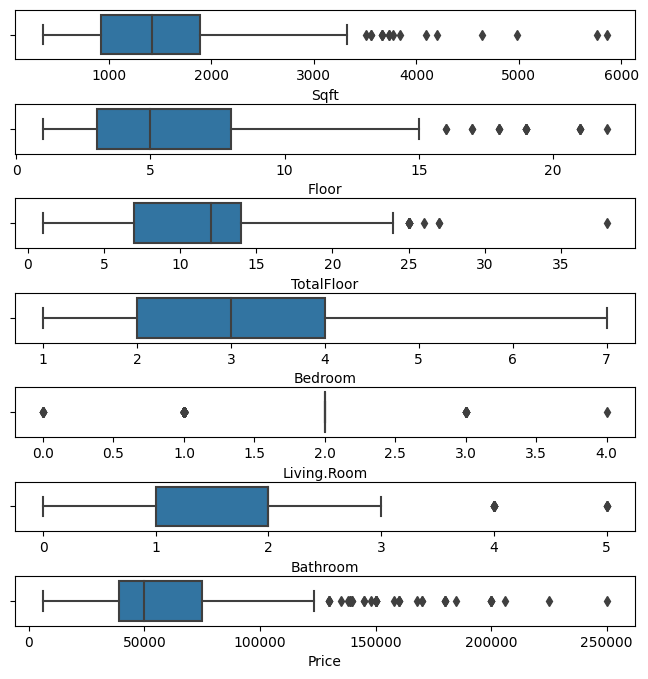

In [112]:
fig,axs=plt.subplots(7,figsize=(8,8))
plt.subplots_adjust(hspace=0.9)
sns.boxplot(x=df['Sqft'],ax=axs[0])
sns.boxplot(x=df['Floor'],ax=axs[1])
sns.boxplot(x=df['TotalFloor'],ax=axs[2])
sns.boxplot(x=df['Bedroom'],ax=axs[3])
sns.boxplot(x=df['Living.Room'],ax=axs[4])
sns.boxplot(x=df['Bathroom'],ax=axs[5])
sns.boxplot(x=df['Price'],ax=axs[6])
plt.show() # all the data have the outlier

In [39]:
# Outlier treatment using replacing with the meadian
df['Price'].skew()

1.8377730040518983

In [57]:
df['Price'].quantile(0.25),df['Price'].quantile(0.85)

(39000.0, 98000.0)

In [50]:
df['Price'].median()

50000.0

In [58]:
df['Price']=np.where(df['Price']<df['Price'].quantile(0.25),39000,df['Price'])
df['Price']=np.where(df['Price']>df['Price'].quantile(0.85),98000,df['Price'])# Replaced with the

<Axes: xlabel='Price'>

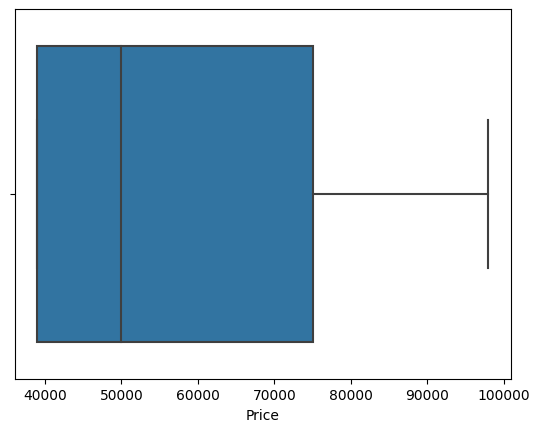

In [59]:
sns.boxplot(x=df['Price'])# We treated all outliers using the Where function for the price column

In [60]:
df.skew()

Sqft           1.427424
Floor          1.378214
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          0.775200
dtype: float64

In [61]:
# Treating outlier from sqft column using the IQR method

In [62]:
df['Sqft'].quantile(0.25),df['Sqft'].quantile(0.75)

(925.08, 1892.856)

In [63]:
IQR=df['Sqft'].quantile(0.75)-df['Sqft'].quantile(0.25)
IQR

967.776

In [66]:
df['Sqft']=np.where(df['Sqft']<df['Sqft'].quantile(0.25),IQR,df['Sqft'])
df['Sqft']=np.where(df['Sqft']>df['Sqft'].quantile(0.75),IQR,df['Sqft'])

<Axes: xlabel='Sqft'>

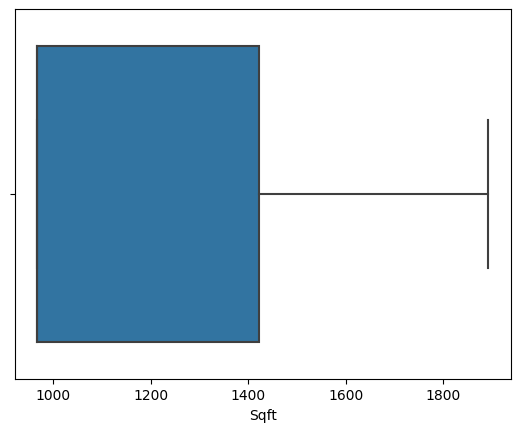

In [67]:
sns.boxplot(x=df['Sqft'])# CAn see the feature is not having outlayer now

In [69]:
df.skew()

Sqft           0.928767
Floor          1.378214
TotalFloor     0.964188
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          0.775200
dtype: float64

In [75]:
# Treating outlayer from the floor column usnig the trimming method
t=df[(df['TotalFloor']<df['TotalFloor'].quantile(0.25))|(df['TotalFloor']>df['TotalFloor'].quantile(0.75))].index

In [76]:
t # wh have the index position of the values so we can esily drop them

Int64Index([  9,  12,  14,  15,  18,  20,  21,  22,  24,  26,
            ...
            620, 621, 622, 623, 631, 633, 634, 635, 638, 640],
           dtype='int64', length=216)

In [78]:
df['TotalFloor']=df['TotalFloor'].drop(t)

<Axes: xlabel='TotalFloor', ylabel='Density'>

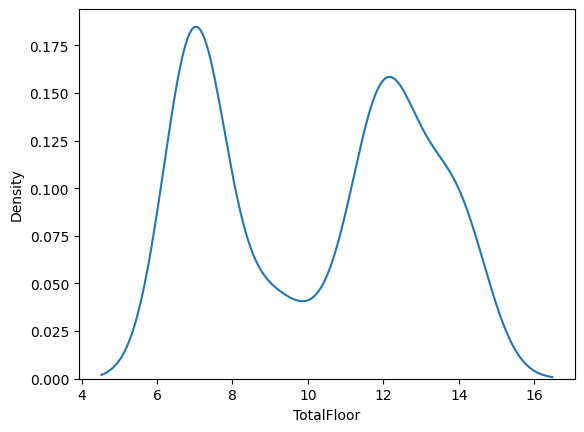

In [80]:
sns.kdeplot(x=df['TotalFloor'])

<Axes: xlabel='TotalFloor'>

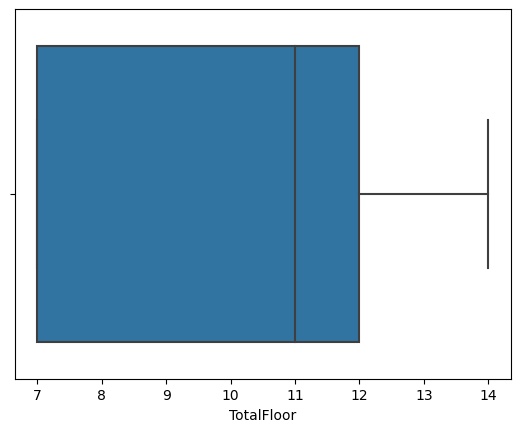

In [82]:
sns.boxplot(x=df['TotalFloor'])# We can see this data is also treated noe

In [83]:
df.skew()

Sqft           0.928767
Floor          1.378214
TotalFloor    -0.031133
Bedroom       -0.049651
Living.Room   -1.181956
Bathroom       0.990518
Price          0.775200
dtype: float64

In [85]:
# Will treat Floor column with log method
df['Floor']=np.log(df['Floor'])

<Axes: xlabel='Floor'>

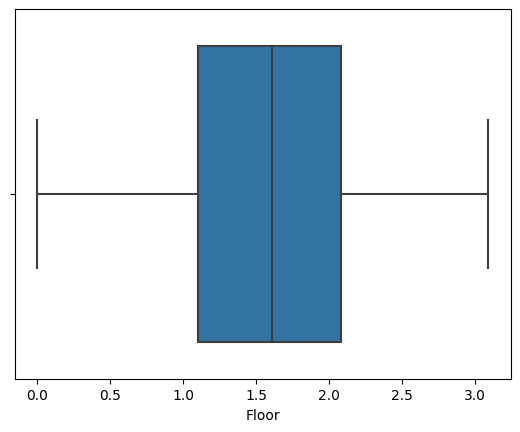

In [88]:
sns.boxplot(x=df['Floor'])

In [113]:
# dividing the data to dependent and independent
x=df.drop('Price',axis=1)
y=df['Price']

In [114]:
# Split the data for train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [115]:
# import knn classifier now
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc

KNeighborsClassifier()

In [116]:
# Apply KNN on the dataset
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:
y_pred=knc.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.13178294573643412

In [120]:
y_pred

array([ 45000,  36000,  34800,  30000, 180000,  32000,  26000,  23000,
        36000,  22000, 100000,  42000,  17000, 160000,  77999, 160000,
        55000,  33000,  32000,  57000,  39000,  80000,  28000,  45000,
       100000,  59800,  50000,  57000,  45000,  70000, 100000,  51999,
       200000,  45000,  53000,  75000,  21000,  38000,  45000,  70000,
        36000,  51999,  52000,  80000,  42000,  28000,  45000,  17000,
        45000,  36000,  43000,  55000,  40000, 100000,  48800,  45000,
        55000, 160000,  60000, 120000,  43000,  58000,  43000, 120000,
       100000,  55000,  17000,  75000,  28000,  45000,  45000,  26000,
        45000,  45000,  43000,  48000, 100000,  17000,  45000,  52000,
        41000,  44000,  39000,  75000,  38000,  33000,  43000,  35000,
       100000,  78000,  17000,  45000,  28000,  38000,  34800,  31000,
        70000,  28000, 200000,  36000,  45000,  70000,  39000,  36000,
        44000,  50000,  80000,  24000,  17000,  44000, 100000,  50000,
      

In [121]:
x_test

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
611,1647.354,11,14,4,2,2
326,1444.548,6,7,2,2,1
129,732.948,8,11,2,1,1
185,1352.040,5,5,3,2,2
621,4198.440,15,19,7,3,4
...,...,...,...,...,...,...
510,2170.380,9,15,4,2,2
198,718.716,5,7,2,2,1
116,3202.200,5,6,4,2,2
472,1544.172,10,12,4,2,2


In [124]:
knc1=KNeighborsClassifier(n_neighbors=4)
knc

KNeighborsClassifier(n_neighbors=4)

In [125]:
knc1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [126]:
y_pred1=knc1.predict(x_test)

In [128]:
accuracy_score(y_pred1,y_test)

0.12403100775193798

In [137]:
knc2=KNeighborsClassifier(n_neighbors=6)
knc2

KNeighborsClassifier(n_neighbors=6)

In [138]:
knc2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [139]:
y_pred2=knc2.predict(x_test)

In [140]:
accuracy_score(y_pred2,y_test)

0.10852713178294573